<a href="https://colab.research.google.com/github/Shireenbanu/My-Portfolio_Shireen/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A3 folder, then '2020FA/A3'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ""
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Getting started.pdf', 'IMG_20170915_180106.jpg', 'IMG_20170915_180103_1.jpg', 'IMG_20170923_203713 (1).jpg', 'IMG_20170915_180009_1.jpg', 'IMG_20170915_175751_1.jpg', 'IMG_20170915_175723.jpg', 'IMG_20170915_175819.jpg', 'IMG_20160103_142144.jpg', 'IMG_20171017_182124.jpg', 'New Doc 2018-09-24 (1).jpg', 'IMG-20180821-WA0000.jpg', 'IMG-20180810-WA0018.jpg', 'IMG-20180827-WA0005.jpg', 'IMG_20180804_202153.JPG', 'IMG-20180908-WA0001.jpg', 'IMG-20180810-WA0029.jpg', 'IMG-20180810-WA0030.jpg', 'IMG_20180820_201542.JPG', 'IMG_20180820_201254.JPG', 'IMG-20180902-WA0001.jpg', 'IMG-20180913-WA0001.jpg', 'DSC_0051.JPG', 'IMG-20180810-WA0016.jpg', 'IMG-20180810-WA0023.jpg', 'DSC_0037 (1).JPG', 'IMG_20180818_222656.JPG', 'IMG_20180818_222042.JPG', 'IMG_20180818_222934.JPG', 'DSC_0003.JPG', 'DSC_0006.JPG', 'IMG-20180827-WA0004.jpg', 'IMG_20180729_183543.JPG', 'DSC_0035 (1).JPG', 'DSC_0034 (1).JPG', 'DSC_0057.JPG', 'IMG_20170923_203713.jpg', 'IMG_20180818_223020.JPG', 'IMG-20180827-WA0006.jpg', 'D

In [ ]:
import pandas as pd

# Load the data
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "ifood_df.csv")  # Replace with your CSV file name
data = pd.read_csv(csv_file_path)

In [ ]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def perform_customer_segmentation(data):
    """
    Perform customer segmentation using K-means clustering
    """
    # Create DataFrame
    df = pd.DataFrame([data]) if isinstance(data, dict) else pd.DataFrame(data)

    # Select relevant features for clustering
    features_for_clustering = [
        'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
        'NumStorePurchases', 'NumWebVisitsMonth', 'Age'
    ]

    # Prepare data for clustering
    X = df[features_for_clustering]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine optimal number of clusters using elbow method
    inertias = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Perform clustering with optimal k=4 (you can adjust this based on elbow curve)
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)

    # Calculate cluster characteristics
    cluster_summary = df.groupby('Cluster')[features_for_clustering].mean()

    # Perform PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Plot 1: Elbow curve
    plt.subplot(131)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')

    # Plot 2: Cluster visualization
    plt.subplot(132)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Customer Segments')
    plt.colorbar(scatter)

    # Plot 3: Average spending by cluster
    spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
    cluster_spending = df.groupby('Cluster')[spending_cols].mean()

    plt.subplot(133)
    cluster_spending.plot(kind='bar', ax=plt.gca())
    plt.title('Average Spending by Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Generate cluster profiles
    profiles = []
    for cluster in range(4):
        cluster_data = df[df['Cluster'] == cluster]
        profile = {
            'Cluster': cluster,
            'Size': len(cluster_data),
            'Avg Income': cluster_data['Income'].mean(),
            'Avg Age': cluster_data['Age'].mean(),
            'Total Spending': cluster_data[spending_cols].sum(axis=1).mean(),
            'Web Visits': cluster_data['NumWebVisitsMonth'].mean(),
            'Deals Purchased': cluster_data['NumDealsPurchases'].mean()
        }
        profiles.append(profile)

    return {
        'cluster_profiles': pd.DataFrame(profiles),
        'cluster_summary': cluster_summary,
        'plots': plt.gcf()
    }


Cluster Profiles:
   Cluster  Size    Avg Income    Avg Age  Total Spending  Web Visits  \
0        0   273  76004.201465  49.542125     1452.069597    2.783883   
1        1   979  34244.308478  48.396323       88.787538    6.377937   
2        2   461  52653.451193  54.770065      609.915401    6.626898   
3        3   492  71705.595528  53.886179     1165.717480    3.473577   

   Deals Purchased  
0         1.380952  
1         1.873340  
2         4.505423  
3         1.674797  

Detailed Cluster Summary:
               Income    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                         
0        76004.201465  545.230769  97.168498       476.655678   
1        34244.308478   36.962206   4.803882        20.613892   
2        52653.451193  394.288503  14.711497       105.832972   
3        71705.595528  626.609756  41.071138       336.211382   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster      

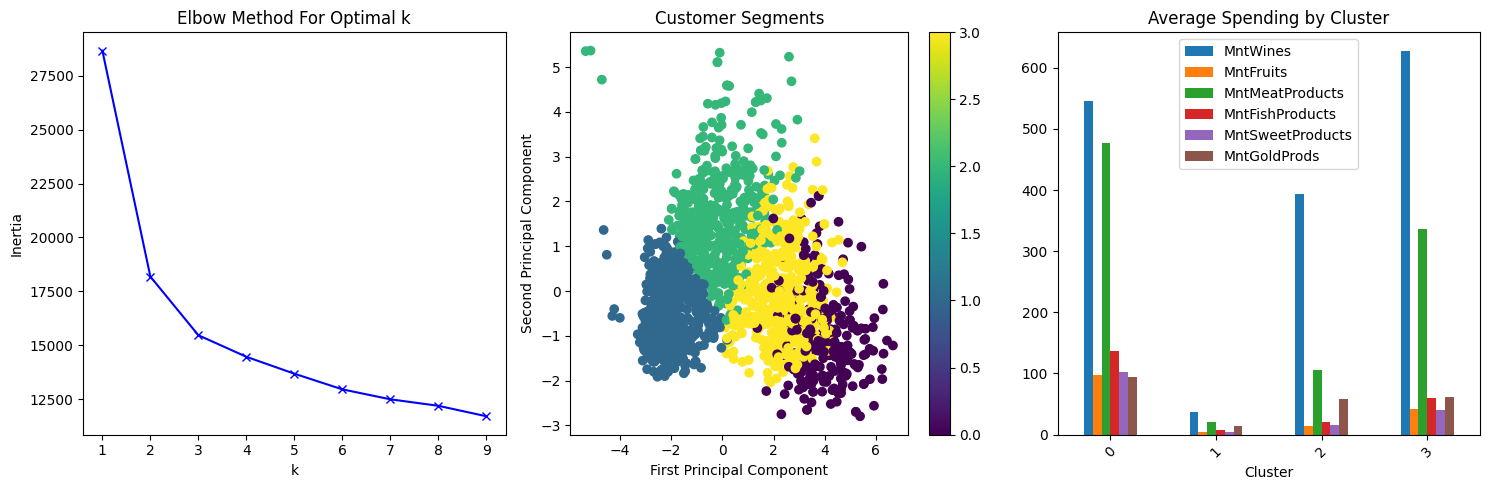

In [ ]:
# Assuming your data is in a DataFrame called 'data'
results = perform_customer_segmentation(data)

# View cluster profiles
print("\nCluster Profiles:")
print(results['cluster_profiles'])

# View detailed cluster summary
print("\nDetailed Cluster Summary:")
print(results['cluster_summary'])

# Display the visualizations
plt.show()

# The above graphs and results are for my techies out there! 📊
# But now, let me break it down for my awesome Marketing Team, especially the Retention folks. 💼  
# So, what I’ve done here is applied some super smart ML algorithms, and guess what? I’ve come up with *4 clusters* of people! 🎩✨
# Now, let’s see how we can use these clusters to keep them coming back for more!
# <font size="2">
# Cluster 0 – The High Roller Foodies (273 customers)
# Avg Income: \$76K
# Avg Age: 50
# Total Spending: \$1.4K
# Store Purchases: 8.35/month
# Retention Strategy:
# 💎 VIP Offers: Exclusive deals on premium items (wine, gourmet foods) via email.
# 🎉 Loyalty Program: Reward big-ticket shoppers with early access to sales.
# 🛍️ Personalized Service: Offer personal shopping assistance in stores. Test luxury products with them first.
#
# Cluster 1 – The Budget Conscious (979 customers)
# Avg Income: \$34K
# Avg Age: 48
# Total Spending: \$88.79
# Web Visits: 6.38/month
# Retention Strategy:
# 💸 Deals & Discounts: Flash sales, Buy More Save More offers.
# 📲 Engagement: Push notifications & Google Ads for targeted deals.
# 🛒 Frequent Offers: Loyalty points for multiple small purchases.
#
# Cluster 2 – The Mid-tier Aficionados (461 customers)
# Avg Income: \$52K
# Avg Age: 55
# Total Spending: \$609.92
# Web Visits: 6.63/month
# Retention Strategy:
# 🍷 Cross-sell/ Upsell: Recommend complementary items (wine with meat).
# 📚 Content: Share recipes, product pairings, or how-to guides.
# 💌 Personalized Emails: Regular product suggestions and exclusive offers.
#
# Cluster 3 – The Omni-channel Shoppers (492 customers)
# Avg Income: \$71K
# Avg Age: 54
# Total Spending: \$1.2K
# Web Visits: 3.47/month
# Retention Strategy:
# 🌐 Omni-channel Experience: Seamless shopping across web, store, and catalog.
# 🎁 Loyalty Program: Earn points for purchases across all channels.
# 🔥 Exclusive Access: Early access to new products (wine, seasonal items).
# </font>
